In [0]:
#Bhargav Muktevi,Sharanya Hunasamaranahalli Thotadarya,Chaitanya Upadrasta

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# **Autoencoders** 






3


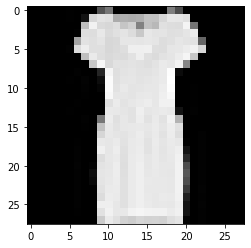

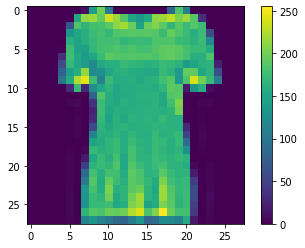

In [2]:
F_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = F_mnist.load_data()
print(train_labels[20])
plt.imshow(train_images[20], cmap="Greys_r")

plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()
train_images = (train_images.astype(np.float32)/ 255. ).reshape((-1, 784))#normalize and reshape
test_images = (test_images.astype(np.float32)/ 255. ).reshape((-1, 784))
train_labels = train_labels.astype(np.int32)#conversion to int32
test_labels = test_labels.astype(np.int32)


In [0]:
model = models.Sequential()
model.add(layers.Dense(128,activation='relu')) #encoder
model.add(layers.Dense(64,activation='relu')) #encoder
model.add(layers.Dense(128,activation='relu')) #decoder

model.add(layers.Dense(784))#decoder

In [4]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.BinaryCrossentropy(from_logits=True))
model.fit(train_images,train_images, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3391
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2936
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2866
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2825
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2799
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2779
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2764
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2753
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2743
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2734


# **Convolutional Autoencoders**

In [0]:
F_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = F_mnist.load_data()


train_images = train_images.reshape([60000,28,28,1]).astype(np.float32)/255
inp=train_images.shape
Conv_model = models.Sequential()
Conv_model.add(layers.Conv2D(128,5,input_shape=(28, 28, 1),activation='relu',padding='same'))
Conv_model.add(layers.Conv2D(64,5,activation='relu',padding='same'))
Conv_model.add(layers.Conv2DTranspose(64,3,activation='relu',padding='same'))
Conv_model.add(layers.Conv2DTranspose(1,5,padding='same'))


In [6]:
Conv_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        204864    
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         1601      
Total params: 246,721
Trainable params: 246,721
Non-trainable params: 0
_________________________________________________________________


In [0]:
Conv_model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.BinaryCrossentropy(from_logits=True))
Conv_model.fit(train_images,train_images, batch_size=128, epochs=10)

# **Unsupervised Pretraining**

In [0]:
F_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = F_mnist.load_data()
train_images = (train_images.astype(np.float32)/ 255. ).reshape((-1, 784))#normalize and reshape
test_images = (test_images.astype(np.float32)/ 255. ).reshape((-1, 784))
train_labels = train_labels.astype(np.int32)#conversion to int32
test_labels = test_labels.astype(np.int32)
 

In [0]:
n = 1000  # for n random indices
index = np.random.choice(train_labels.shape[0], n, replace=False)
Y=train_labels[index]
X=train_images[index]


In [0]:
model = models.Sequential()
model.add(layers.Dense(128,activation='relu')) #encoder
model.add(layers.Dense(64,activation='relu')) #encoder
model.add(layers.Dense(128,activation='relu')) #decoder

model.add(layers.Dense(784))#decoder


In [15]:

model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.BinaryCrossentropy(from_logits=True))
model.fit(train_images,train_images, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3377
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2932
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2862
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2824
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2798
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2779
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2764
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2752
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2742
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2732


In [0]:
pre_train = models.Sequential() 
pre_train.add(model.layers[0])
pre_train.add(model.layers[1])
X_train=pre_train.predict(X)
X_test=pre_train.predict(test_images)


In [17]:
#Training a Feedforward neural network to on freezed encoder

classifier=models.Sequential()
classifier.add(layers.Dense(32,activation='relu'))
classifier.add(layers.Dense(10))
classifier.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['sparse_categorical_accuracy'])
classifier.fit(X_train,Y, batch_size=16, epochs=10)

Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 2.8497 - sparse_categorical_accuracy: 0.2440
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 1.4967 - sparse_categorical_accuracy: 0.4900
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 1.1354 - sparse_categorical_accuracy: 0.6100
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.9524 - sparse_categorical_accuracy: 0.6770
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.8323 - sparse_categorical_accuracy: 0.7170
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.7646 - sparse_categorical_accuracy: 0.7350
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.7122 - sparse_categorical_accuracy: 0.7560
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.6950 - sparse_categorical_accuracy: 0.7580
Epoch 9/10
63/63 [==============================] - 0s 1ms/step 

In [18]:
classifier.evaluate(X_test,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.6993 - sparse_categorical_accuracy: 0.7444


[0.6993327140808105, 0.7444000244140625]